### 목표
- 패션 이미지를 활용해서 신경망 분류 모델을 만들어보자!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터
from tensorflow.keras.datasets import fashion_mnist

데이터 살펴보기

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 추가적인 설명
# data 하나의 변수에 담았으면
# X_train = data[0][0] # 훈련문제
# y_train = data[0][1] # 훈련답
# X_test = data[1][0] # 테스트문제
# y_test = data[1][1] # 테스트답

In [4]:
img = X_train[100]
img_lb = y_train[100]

display(img)
display(img_lb)
# 흑백 표현한 데이터 : 0~255
# 'gray' : 흑백이미지 출력

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

8

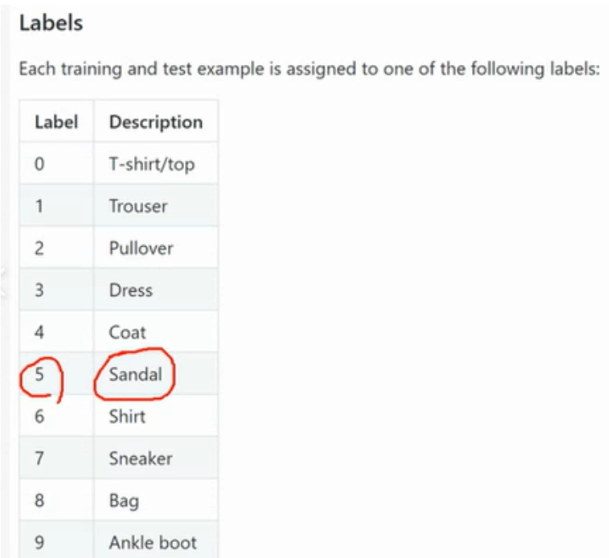

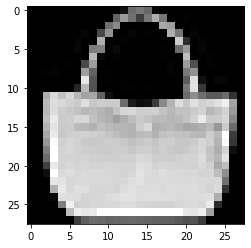

In [5]:
# 이미지 출력
plt.imshow(img, cmap = 'gray')
plt.show()

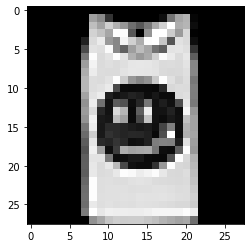

In [6]:
img = X_train[101]
img_lb = y_train[101]
plt.imshow(img, cmap = 'gray')
plt.show()

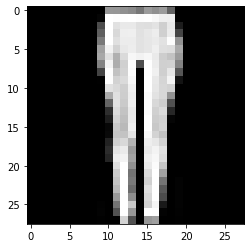

In [7]:
img = X_train[102]
img_lb = y_train[102]
plt.imshow(img, cmap = 'gray')
plt.show()

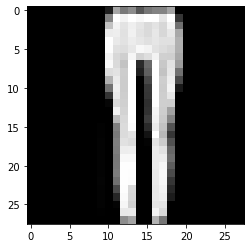

In [8]:
img = X_train[103]
img_lb = y_train[103]
plt.imshow(img, cmap = 'gray')
plt.show()

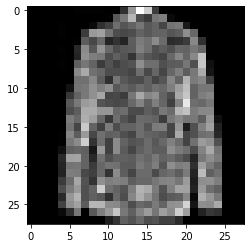

In [9]:
img = X_train[104]
img_lb = y_train[104]
plt.imshow(img, cmap = 'gray')
plt.show()

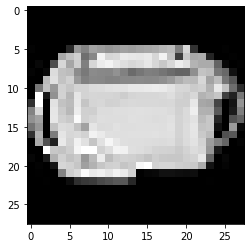

In [10]:
img = X_train[105]
img_lb = y_train[105]
plt.imshow(img, cmap = 'gray')
plt.show()

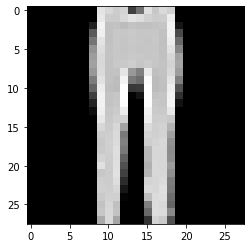

In [11]:
img = X_train[106]
img_lb = y_train[106]
plt.imshow(img, cmap = 'gray')
plt.show()

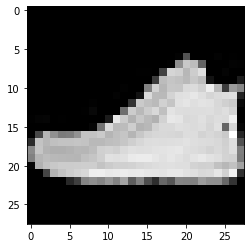

In [12]:
img = X_train[107]
img_lb = y_train[107]
plt.imshow(img, cmap = 'gray')
plt.show()

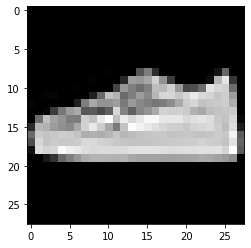

In [13]:
img = X_train[108]
img_lb = y_train[108]
plt.imshow(img, cmap = 'gray')
plt.show()

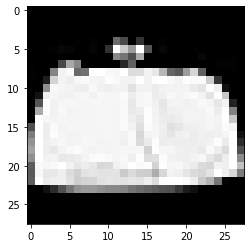

8


In [14]:
img = X_train[109]
img_lb = y_train[109]
plt.imshow(img, cmap = 'gray')
plt.show()
print(img_lb)

In [15]:
# 클래스의 개수는?
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

답데이터 인코딩

In [16]:
from tensorflow.keras.utils import to_categorical
y_tr_en = to_categorical(y_train)
y_te_en = to_categorical(y_test)

In [17]:
y_tr_en

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

문제 데이터 크기 변환
- 이미지 한장 하나의 행으로 변환하기
- 훈련문제 60000, -1
- 테스트문제 10000, -1

In [18]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

# 크기확인
print('훈련문제크기:', X_train.shape)
print('테스트문제크기:', X_test.shape)

훈련문제크기: (60000, 784)
테스트문제크기: (10000, 784)


과대적합 확인하기 위해 검증용 데이터 분리시켜 만들어두기

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_tr_en,
                                                  test_size = 0.25,
                                                  random_state = 3)

In [21]:
# 크기확인
print('훈련용:', X_train.shape, y_train.shape)
print('검증용:', X_val.shape, y_val.shape)

훈련용: (45000, 784) (45000, 10)
검증용: (15000, 784) (15000, 10)


신경망 설계

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# 뼈대 생성
model_cat = Sequential()
# 입력층 + 중간층
model_cat.add(Dense(units = 1000, input_dim=784, activation='relu'))
# 중간층 3번
model_cat.add(Dense(units = 500, activation='relu'))
model_cat.add(Dense(units = 100, activation='relu'))
model_cat.add(Dense(units = 50, activation='relu'))
# 출력층
# 다중분류
# units = 10 (클래스 개수만큼)
model_cat.add(Dense(10, activation='softmax'))
# 요약
model_cat.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 1,341,160
Trainable params: 1,341,160
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 2. 학습/평가 설정
# compile
# loss -> categorical_crossentropy
# optimizer -> adam
# metrics -> accuracy
model_cat.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                 metrics = ['accuracy'])

In [24]:
# 3. 학습
h1 = model_cat.fit(X_train, y_train,
                   epochs = 30,
                   validation_data = (X_val, y_val),
                   batch_size = 256,
                   verbose = 1)

Epoch 1/30
176/176 [==============================] - 2s 12ms/step - loss: 6.3368 - accuracy: 0.7055 - val_loss: 1.1128 - val_accuracy: 0.7975
Epoch 2/30
176/176 [==============================] - 2s 12ms/step - loss: 0.7926 - accuracy: 0.8121 - val_loss: 0.7159 - val_accuracy: 0.8196
Epoch 3/30
176/176 [==============================] - 2s 12ms/step - loss: 0.5667 - accuracy: 0.8352 - val_loss: 0.5191 - val_accuracy: 0.8415
Epoch 4/30
176/176 [==============================] - 2s 12ms/step - loss: 0.4056 - accuracy: 0.8618 - val_loss: 0.4488 - val_accuracy: 0.8505
Epoch 5/30
176/176 [==============================] - 2s 12ms/step - loss: 0.3689 - accuracy: 0.8725 - val_loss: 0.4328 - val_accuracy: 0.8563
Epoch 6/30
176/176 [==============================] - 2s 12ms/step - loss: 0.3426 - accuracy: 0.8796 - val_loss: 0.4033 - val_accuracy: 0.8668
Epoch 7/30
176/176 [==============================] - 2s 12ms/step - loss: 0.3014 - accuracy: 0.8904 - val_loss: 0.3943 - val_accuracy: 0.8640

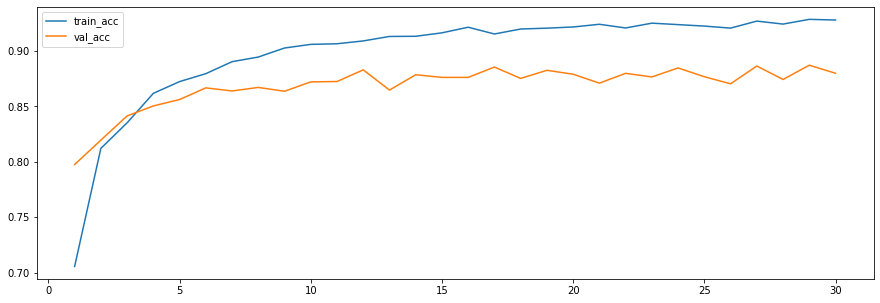

In [25]:
# 그래프로 시각화
# accuracy
# val_accuracy 변화하는 선 그래프 그리기

plt.figure(figsize=(15,5))
plt.plot(range(1,31),
        h1.history['accuracy'], label='train_acc') # 훈련데이터
# 검증데이터
plt.plot(range(1,31),
        h1.history['val_accuracy'],
        label = 'val_acc') # 검증데이터
plt.legend()
plt.show()

In [26]:
# 테스트 성능 확인
# evaluate()
model_cat.evaluate(X_test, y_te_en)
# 앞에는 loss 뒤에는 score(정확도)

313/313 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8779


[0.40981802344322205, 0.8779000043869019]

#### 최적화 모델 찾기
모델 체크 포인트 : 모델 저장  
얼리스탑핑 : 조기학습 중단(과대적합 방지, 시간낭비를 방지)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [28]:
# 1. 모델 저장 경로 지정
save_path = './model/fashion_model_{epoch:03d}_{val_acc:.4f}.hdf5'
# epoch 신경망에서 설정한 반복 횟수 의미
# d : 10진수 형태, 03-> 0이 3개 붙어있는 형태의 자릿수
# f : 실수 형태, .4-> 소수점 4자리까지 출력(0.001??->이건 3자리 아닌가)
f_mckp = ModelCheckpoint(filepath = save_path, #파일 경로 설정
                        monitor = 'val_acc', #해당 값을 기준으로 파일 저장
                        save_best_only = True, # monitor값이 가장 최고점을 갱신했을때 저장
                        verbose = 1) # 모델 개선 및 저장했을때 메시지 출력
# 2. 조기 학습 중단 지정
f_early = EarlyStopping(monitor = 'val_acc',
                       patience = 5)

# patience - monitor의 값 개선을 몇번을 기다려줄건지 설정


In [29]:
# 3. 신경망 모델 생성 (위에 있는 모델 복사)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# 뼈대 생성
model_cat = Sequential()
# 입력층 + 중간층
model_cat.add(Dense(units = 1000, input_dim=784, activation='relu'))
# 중간층 3번
model_cat.add(Dense(units = 500, activation='relu'))
model_cat.add(Dense(units = 100, activation='relu'))
model_cat.add(Dense(units = 50, activation='relu'))
# 출력층
# 다중분류
# units = 10 (클래스 개수만큼)
model_cat.add(Dense(10, activation='softmax'))
# 요약
model_cat.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 1,341,160
Trainable params: 1,341,160
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 학습/평가방법 설정
model_cat.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['acc'])

In [31]:
# 4. 모델 학습할 때 연결
model_cat.fit(X_train, y_train,
             validation_data = (X_val, y_val),
             batch_size = 256,
             callbacks = [f_mckp, f_early]) # 모델 체크포인트 연결, 얼리스탑핑 연결

173/176 [============================>.] - ETA: 0s - loss: 4.4827 - acc: 0.7122
Epoch 00001: val_acc improved from -inf to 0.78867, saving model to ./model\fashion_model_001_0.7887.hdf5
176/176 [==============================] - 3s 16ms/step - loss: 4.4235 - acc: 0.7138 - val_loss: 0.7474 - val_acc: 0.7887


저장된 모델 불러오기(로딩)

In [32]:
from tensorflow.keras.models import load_model

In [33]:
best_model = load_model('./model/fashion_model_001_0.7887.hdf5')

In [34]:
best_model.evaluate(X_test, y_te_en)

313/313 [==============================] - 1s 2ms/step - loss: 0.7996 - acc: 0.7813


[0.7996019124984741, 0.7813000082969666]